In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import seaborn as sns
from statistics import mean 

noDupFrgDf = pd.read_csv('./data/noDupFrgDf.csv')
print(len(noDupFrgDf))
noDupFrgDf = noDupFrgDf[noDupFrgDf['aa_length'] <= 2500]
print(len(noDupFrgDf))
noDupFrgDf.head(n=3)

847894
840803


,tr,aa_length,protein,OS,OX,GN,PE,SV
0,A0A010RP22|A0A010RP22_9PEZI,1704,Pentafunctional AROM polypeptide,Colletotrichum fioriniae PJ7,1445577,CFIO01_03140,3,1.0
2,A0A017S5L2|A0A017S5L2_ASPRC,1582,Pentafunctional AROM polypeptide,Aspergillus ruber (strain CBS 135680),1388766,EURHEDRAFT_415450,3,1.0
3,A0A023PXE1|A0A023PXE1_9TELE,294,Elongation of very long chain fatty acids prot...,Chirostoma estor,587617,ELOVL5,2,1.0


In [5]:
homoDf = noDupFrgDf[noDupFrgDf['OS'].str.contains('Homo sapiens')]
homoLenLt = list(homoDf['aa_length'])

homoLen10Dic = {}
homoLenNo10Lt = [x - (x % 10) for x in homoLenLt]
for ii, cLen in enumerate(homoLenNo10Lt):
    # if ii == 1: break
    if cLen in homoLen10Dic.keys():
        homoLen10Dic[cLen] += 1
    else:
        homoLen10Dic[cLen] = 1
print('-----------------', len(homoDf))

x10Bin = [x for x in range(0, 2500, 10)]
homoLen10DicKeys = list(homoLen10Dic.keys())
homoLen10DicKeys.sort()
xyDic = {x:homoLen10Dic[x] if x in homoLen10DicKeys else 0 for x in x10Bin  }
y10Bin = [xyDic[x] for x in x10Bin]
print(y10Bin)

----------------- 2305
[0, 0, 1, 14, 25, 27, 40, 41, 35, 48, 42, 37, 45, 42, 41, 48, 48, 43, 40, 34, 30, 29, 34, 33, 28, 42, 19, 33, 31, 24, 29, 28, 28, 39, 31, 18, 36, 33, 28, 24, 27, 25, 24, 26, 24, 22, 17, 23, 26, 25, 20, 20, 22, 22, 20, 17, 14, 13, 18, 24, 25, 14, 11, 14, 7, 11, 10, 12, 9, 6, 19, 13, 13, 18, 15, 7, 12, 6, 13, 7, 12, 4, 12, 6, 8, 9, 6, 7, 10, 7, 9, 7, 9, 6, 8, 4, 7, 5, 5, 6, 3, 7, 2, 5, 4, 8, 4, 5, 7, 7, 3, 3, 7, 1, 4, 3, 3, 2, 3, 4, 1, 3, 4, 4, 5, 7, 2, 5, 0, 2, 4, 3, 3, 3, 5, 0, 2, 1, 2, 0, 2, 3, 3, 1, 1, 1, 1, 3, 1, 0, 2, 1, 3, 2, 1, 1, 2, 1, 1, 0, 3, 1, 2, 0, 4, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 3, 0, 0, 0, 1, 0, 0, 3, 0, 2, 0, 2, 2, 1, 1, 4, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 3, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1]


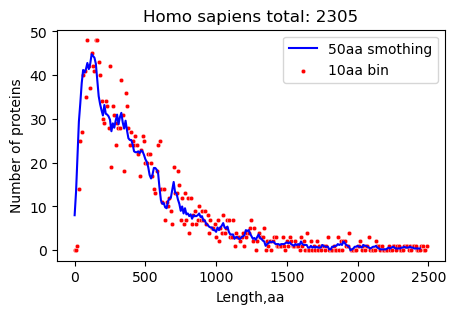

In [25]:
xAver = [x10Bin[x] for x in range(len(x10Bin)-5)]
yAver = [mean(y10Bin[x:x+5]) for x in range(len(xAver))]
for ii in range(5):
    yAver.append(np.nan)



numberOfRow, numberOfCol = 1 , 1
fig, axes = plt.subplots(numberOfRow, numberOfCol, figsize=(numberOfCol*5,numberOfRow*3) )
plt.subplots_adjust(
    # left=0.1,
    # bottom=0.1, 
    # right=0.9, 
    # top=0.9, 
    wspace=0.3, 
    hspace=0.4
)

# wPlot = sns.lineplot(x=x10Bin, y=y10Bin, ax=axes, color='blue')
wPlot = sns.lineplot(x=x10Bin, y=yAver, ax=axes, color='blue', label='50aa smothing')
wPlot = sns.scatterplot(x=x10Bin, y=y10Bin, ax=axes, s=10, color='red', label='10aa bin' )
axes.set_ylabel("Number of proteins", fontsize=10)
axes.set_xlabel("Length,aa", fontsize=10) 
axes.set_title('Homo sapiens' + ' total: '+ str(len(homoDf))) 
axes.legend()